In [1]:
#Machine learning on a high level is made up of supervised and unsupervised learning
#Within supervised learning, there is classification and regression
#Classisfication problems are where the target is a categorical value
#Regression problems are where the target is a numerical value
#Logistic regression while it has regression in its name is an algorithm for solving classification problems


In [1]:
#At first, the Titanic dataset will be used and subsequently, the breast cancer dataset
#In the Titanic dataset which is stored in a csv file, the Survived column is the target
#The Survived column is a list of 1's and 0's where 1 means the passenger survived and 0 means didn't survive
#The remaining columns, called features, are the information about the passenger which are used to predict the target
#The breast cancer dataset is built into scikit-learn wherein each datapoint has measurements from an image of a breast mass
#and whether or not it's cancerous
#The target is a 1d numpy array of 1's and 0's where 0 means malignant and 1 means benign
#The goal will be to use these measurements to predict if the mass is cancerous

In [3]:
#Classification graphically
#Start with only two features (Fare and Age) for simplicity
#On the x-axis, the passenger's fare and on the y-axis their age
#The plotted dots can have one of two colors - yellow, representing passengers that survived and purple, who didn't survive
#The task of a linear model is to find the line that best separates the two classes
#For example, if a passenger's datapoint lies on the right side of the line, survival is predicted
#if on the left side of the line, they didn't survive

<img src="IMG_20230815_124500.jpg" style="width:400px;height:200px;">

In [4]:
#Equation for the line
#A line is defined by an equation in the following form
#0 = ax + by + c, the values a, b, c are the coefficients which control where the line is
#Any three values will define a unique line
#Let a = 1, b = -1 and c = -30
#So, 0 = (1)x + (-1)y + (-30), is a unique line with the three coefficients being: 1, -1, 30

In [5]:
#Recall data is being plotted with Fare of the passenger on the x-axis and Age on the y-axis
#To draw a line from an equation, two points that are on the line are needed
#So, the point (30, 0) if plugged into the equation - (Fare 30, Age 0) - lies on the line
#30 - 0 - 30 = 0
#Likewise, The (50, 20) - (Fare 50, Age 20)
#50 - 20 -30 = 0

In [6]:
#Using the same line/equation, determine which side of the line a passenger lies based on their data - (Fare 100, Age 20)
#0 = (1)x + (-1)y - 30
#(1)100 + (-1)20 - 30 = 100 20 - 30 = 50
#Since the resultant value is positive, the point is on the right side of the line, predicting the passenger survived
#Take another passenger - (Fare 10, Age 50)
#(1)10 + (-1)50 - 30 = -70
#Since this value is negative, the point lies on the left side of the line, predicting the passenger didn't survive

<img src="IMG_20230815_123720.jpg" style="width:400px;height:200px;">

In [7]:
#Logistic Regression is a way of mathematically finding the best line
#Logistic Regression gives not just a prediction but also a probability, a value between 0 and 1
# The equation for calculating this score is given by the function called the sigmoid
#The equation for the line is in the form 0 = ax +by + c (x is the Fare, y is the Age, 
#a, b, c are the coefficients that we control)
#The number e is the mathematical constant, approximately 2.71828

<img src = 'IMG_20230815_135339.jpg' style="width:400px;height:200px;">

In [8]:
#To calculate how good our line is, we need to score whether our predictions (in terms of predicted probability) are correct
#The likelihood will be a value between 0 and 1, the higher the value the better the line is
#The likelihood equation rewards if prediction is correct otherwise penalizes
#In the likelihood equation, p is the predicted probability

<img src="IMG_20230815_140726.jpg" style="width:400px;height:200px;">

In [9]:
#If the predicted probability p is 0.25 and the passenger didn't survive, the score would be (1 - p) 0.75 (good) (rewarded)
#If the predicted probability p is 0.25 and the passenger survived, the score would be (p) 0.25 (bad) (penalized)
#If there are 4 data points, the total score is computed by multiplying the individual scores of each data point
#Thus, different lines are compared to determine the best one
#0.25 * 0.75 * 0.6* 0.8 = 0.09
#The value is always going to be really small as it is the likelihood that the model predicts everything perfectly
#A perfect model would have a predicted probability of 1 for all positive cases and 0 for all negative cases
#The likelihood is how the possible choices of a best fit line are scored and compared

<img src="IMG_20230815_140659.jpg" style="width:400px;height:200px;">

In [10]:
#Build a logistic regression model with scikit-learn
#prep data with pandas
import pandas as pd
#load the Titanic dataset stored as a csv file
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
#make all columns numerical by creating boolean column for Sex which originally is categorical - male/female
df['male'] = df['Sex'] == 'male'
#check the first few lines of the resultant pandas DataFrame with all the columns
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,male
0,0,3,male,22.0,1,0,7.2500,True
1,1,1,female,38.0,1,0,71.2833,False
2,1,3,female,26.0,0,0,7.9250,False
3,1,1,female,35.0,1,0,53.1000,False
4,0,3,male,35.0,0,0,8.0500,True


In [11]:
#take all the relevant features and create a numpy array called X
import numpy as np
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
#take the target (the Survived column) and store it in a variable y
y = df['Survived'].values
X

array([[3, True, 22.0, 1, 0, 7.25],
       [1, False, 38.0, 1, 0, 71.2833],
       [3, False, 26.0, 0, 0, 7.925],
       ...,
       [3, False, 7.0, 1, 2, 23.45],
       [1, True, 26.0, 0, 0, 30.0],
       [3, True, 32.0, 0, 0, 7.75]], dtype=object)

In [12]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [13]:
#import the Logistic Regression model
from sklearn.linear_model import LogisticRegression
#instantiate the class
model = LogisticRegression()
#The previously prepared data can now be used to train the model using the fit method
#It takes two arguments: X (the features as a 2d numpy array) and y (the target as a 1d numpy array)
#For simplicity, build a Logistic Regression model using just the Fare and Age columns/features
X = df[['Fare', 'Age']].values
y = df['Survived'].values
#use the fit method to build the model
model.fit(X, y)
#fitting/training the model means using the data to choose a line of best fit
#check the coefficients with the coef_ and intercept_ attributes
model.coef_, model.intercept_

(array([[ 0.01615949, -0.01549065]]), array([-0.51037152]))

In [14]:
#this values mean that the equation is as follows:
#0 = 0.01615949x + -0.01549065y + -0.51037152
#the line drawn on the graph

<img src="IMG_20230815_145304.jpg" style="width:400px;height:200px;">

In [15]:
#recall only 2 features have been used
#now, rebuild the model with all of the features
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
#take the target (the Survived column) and store it in a variable y
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
#make predictions
model.predict(X)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [16]:
#the first passenger in the dataset is: [3, True, 22.0, 1, 0, 7.25]
model.predict([[3, True, 22.0, 1, 0, 7.25]])

array([0], dtype=int64)

In [17]:
#model's prediction for the first 5 rows
model.predict(X[:5])

array([0, 1, 1, 1, 0], dtype=int64)

In [18]:
#verify with target values
y[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [19]:
#score the model
#accuracy score gives a sense of how good the model is by counting the number of datapoints it predicts correctly
#create an array that has the predicted y values
y_pred = model.predict(X)
#create an array of boolean values of whether or not the model predicted each passenger correctly
y == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,

In [20]:
#get the number of 'true' values
(y == y_pred).sum()

714

In [21]:
#get the total number of passengers
y.shape[0]

887

In [22]:
#compute the accuracy score
(y == y_pred).sum()/y.shape[0]

0.8049605411499436

In [23]:
#get the same result using score method
model.score(X, y)

0.8049605411499436

In [24]:
#Introduce the breast cancer dataset
#load the dataset and take a peak at the data
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
#the object returned and stored in the cancer_data variable is an object similar to a Python dictionary
cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
#examine DESCR which gives a detailed description of the dataset
cancer_data['DESCR']

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [26]:
#there are 30 features, 569 datapoints, and the target is either Malignant (cancerous) or Benign (not cancerous)
#there is additional info and are several features that are calculated based on other columns
#the process of figuring out what additional features to calculate is feature engineering
#pull the feature and target data out of the cancer_data object
cancer_data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [27]:
cancer_data['data'].shape

(569, 30)

In [28]:
#column/feature names
cancer_data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [29]:
#create a pandas DataFrame with all the feature data
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
#the target data - 1d numpy array of 1's and 0's
cancer_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [31]:
cancer_data['target'].shape

(569,)

In [32]:
#interpret the 1's and 0's - 0 means malignant and 1 means benign
cancer_data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [33]:
#add the target data to the pandas DataFrame
df['target'] = cancer_data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [34]:
#build a logistic regression model
#build the feature matrix X
X = df[cancer_data.feature_names].values
#build the target array y
y = df['target'].values
#create a Logistic Regression object
model = LogisticRegression()
model.fit(X, y)

C:\Users\ANTON CHAKMA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
#a Convergence Warning is encountered which means the model needs more time to find the optimal solution
#one option is to increase the number of iterations
#or switch to a different solver - the solver is the algorithm that the model uses to find the equation of the line
#among the possible solvers, choose one
model = LogisticRegression(solver='liblinear')
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
#predict for the first datapoint
#the predict method takes a 2d array
model.predict([X[0]])

array([0])

In [37]:
#check model performance
model.score(X, y)

0.9595782073813708

In [38]:
#Model evaluation in depth
#evaluation metrics
#Accuracy is a straightforward metric if the classes are evenly split but is misleading if the classes are imbalanced
#It's not only how many of the positive datapoints the model predicts correctly but also how many of the negative datapoints
#Confusion Matrix (or Error Matrix or Table of Confusion) produces all the important values and fully describes how a model
#performs on a dataset, though is difficult to use to compare models

In [39]:
#Confusion matrix is a table showing four values:
#Datapoints predicted positive that are actually positive (True Positives)
#Datapoints predicted positive that are actually negative (False Positives)
#Datapoints predicted negative that are actually positive (False Negatives)
#Datapoints predicted negative that are actually negative (True Negatives)
#In the Titanic dataset, there are 887 passengers, 342 survived (positive) and 545 didn't survive (negative)

<img src="IMG_20230815_195547.jpg" style="width:400px;height:200px;">

In [40]:
#The first and fourth are the datapoints, the model predicted correctly and the second and third are the datapoints
#the model predicted incorrectly
#compute the accuracy using the confusion matrix - the accuracy is the number of datapoints predicted correctly divided by
#the total number of datapoints
#(233+480)/233+65+109+480) = 713/887 = 80.38% (the same value as computed earlier)

In [41]:
#The confusion matrix is described as follows
#The four values of the confusion matrix (TP, TN, FP, FN) are used to compute several different metrics

<img src="IMG_20230815_204314.jpg" style="width:400px;height:200px;">

In [42]:
#Two commonly used metrics for classification are precision and recall
#Both can be defined using quadrants from the cofusion matrix
#Precision is a measure of how precise the model is with its positive predictions

<img src="IMG_20230815_211121.jpg" style="width:400px;height:200px;">

In [43]:
#From the confusion matrix for the model for the Titanic dataset, calculate the precision
#precision = 233/(233+65) = 0.7819

In [44]:
#Recall is the percent of positive cases that the model predicts correctly
#Recall is a measure of how many of the positive cases the model can recall

<img src="IMG_20230815_211901.jpg" style="width:400px;height:200px;">

In [45]:
#From the confusion matrix for the model for the Titanic dataset, calculate the recall
#recall = 233/(233+109) = 0.6813

In [46]:
#There will be situations where choosing between increasing the recall (while lowering the precision) or increasing the 
#precision (and lowering the recall) will be necessitated depending on high cost to false positives for example
#There's no hard and fast rule on what values of precision and recall you are shooting for
#Sometimes, you would want more of a balance between precision and recall

In [47]:
#Accuracy was an appealing metric because it was a single number
#Precision and recall are two varying numbers so it's not always obvious how to choose between two models
#The F1 score is the harmonic mean of the precision and recall values so that there is a single score for a model

<img src="IMG_20230815_213231.jpg" style="width:400px;height:200px;">

In [48]:
#Calculate the F1 score for the model for the Titanic dataset, given the precision and recall calculated earlier
#2(0.7819) (0.6813) / (0.7819 + 0.6813) = 0.7281

In [49]:
#Scikit-learn has a separate function built in for each of the metrics - accuracy, precision, recall, F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Recall the code from the Titanic dataset
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [50]:
#Each function takes two 1d numpy arrays: the true values of the target and the predicted values of the target
print("accuracy:", accuracy_score(y, y_pred))

accuracy: 0.8049605411499436


In [51]:
print("precision:", precision_score(y, y_pred))

precision: 0.7734627831715211


In [52]:
print("recall:", recall_score(y, y_pred))

recall: 0.6988304093567251


In [53]:
print("f1 score:", f1_score(y, y_pred))

f1 score: 0.7342549923195083


In [54]:
#With a single model, the metric values do not tell us a lot
#For some problems a value of 60% is good, and for others a value of 90% is good, depending on the difficulty of the problem
#The metric values can be used to compare different models to pick the best one

In [55]:
#Implement confusion matrix in scikit-learn
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[475,  70],
       [103, 239]], dtype=int64)

In [56]:
#Scikit-learn reverses the confusion matrix to show the negative counts first
#Since negative target values correspond to 0 and positive to 1, scikit-learn has orderd them in this order
#Confusion matrix in scikit-learn

<img src="IMG_20230815_220136.jpg" style="width:400px;height:200px;">

In [57]:
#Typical confusion matrix

<img src="IMG_20230815_220119.jpg" style="width:400px;height:200px;">

In [58]:
#The previous model was built with all of the data and it performed well on the same data
#This is artificially inflating the numbers as it can lead to overfitting
#Overfitting is when the model performs well on the data it has already seen but does not perform well on new data
#An overfit model tries to get every single datapoint on the correct side of the line but it misses the essence of the data
#The more features there are in the dataset, the more prone the model will be to overfitting

<img src="IMG_20230815_222045.jpg" style="width:400px;height:200px;">

In [59]:
#To simulate making predictions on new unseen data, break the dataset into a training set and a test set
#Training set is used to build the models, test set is used for evaluating the models
#A standard breakdown is to put 70-80% of the data in the training set and 20-30% in the test set
#Training and testing in scikit-learn
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

print("whole dataset:", X.shape, y.shape)
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)

whole dataset: (887, 6) (887,)
training set: (665, 6) (665,)
test set: (222, 6) (222,)


In [60]:
#The size of the training set can be changed by using the train_size parameter, e.g., train_test_split(X, y, train_size=0.60)
#Build a scikit-learn model using a training set
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
#Evaluate the model using the test set
model.score(X_test, y_test)

0.8018018018018018

In [62]:
y_pred = model.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

accuracy: 0.8018018018018018
precision: 0.7846153846153846
recall: 0.6296296296296297
f1 score: 0.6986301369863014


In [63]:
#The accuracy, precision, recall and F1 score values are very similar to the values computed using the entire datase
#This is a sign the model is not overfit
#If you run the code, you get different scores each time as train test split is done randomly

In [64]:
#Use random state to get the same split every time
#The random state is also called a seed
X = [[1, 1], [2, 2], [3, 3], [4, 4]]
y = [0, 0, 1, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 27)
print('X_train', X_train)
print('X_test', X_test)

X_train [[3, 3], [1, 1], [4, 4]]
X_test [[2, 2]]


In [65]:
#Foundations of the ROC (receiver operating characteristic) curve
#As regards the trade-off between precision and recall, a logistic regression model has an easy way of shifting between
#emphasizing precision and emphasizing recall by altering the logistic regression threshold
#A logistic regression model doesn't just return a prediction, it also returns a probability value between 0 and 1
#Typically, we say if the value is >= 0.5, the passenger is predicted to survive, and if the value is < 0.5, the passenger
#didn't survive - we could choose any threshold between 0 and 1
#Logistic regression threshold - if we make the threshold higher, we'll have fewer positive predictions but our positive
#predictions are more likely to be correct, which means the precision would be higher and the recall lower
#If we make the threshold lower, we'll have more positive predictions - more likely to catch all the positive cases - which 
#that the recall would be higher and the precision lower
#Each choice of a threshold is a different model - an ROC curve is a graph showing all of the possible models and their
#performance

In [66]:
#An ROC Curve is a graph of the sensitivity vs. the specificity - these values demonstrate the same trade-off that precision
#and recall demonstrate
#Define sensitivity and specificity using the confusion matrix

<img src="IMG_20230815_204314.jpg" style="width:400px;height:200px;">

In [67]:
#The sensitivity is another term for the recall, which is the true positive rate

<img src="IMG_20230816_124350.jpg" style="width:400px;height:200px;">

In [68]:
#The specificity is the true negative rate

<img src="IMG_20230816_124328.jpg" style="width:400px;height:200px;">

In [68]:
#Following a train test split of the Titanic dataset, the confusion matrix is as follows

<img src="IMG_20230816_124926.jpg" style="width:400px;height:200px;">

In [69]:
#Calculate the sensitivity and specificity
#Sensitivity = 61/(61+35) = 61/96 = 0.6354
#Specificity = 105/(105+21) = 105/126 = 0.8333
#The goal is to maximize these two values, though generally making one larger makes the other lower
#It will depend on the situation whether we put more emphasis on sensitivity or specificity
#For graphing, the standard is to use the sensitivity and specificity

In [70]:
#Sensitivity and Specificity in scikit-learn
#There are no functions defined in scikit-learn for sensitivity and specificity
#Sensitivity is the same as recall - recall of the positive cases
#Specificity is the recall of the negative class - it can be got from the sklearn function precision_recall_fscore_support
#This function returns 4 arrays, of which the second array is the recall
#The recall contains two values - the first is the recall of the negative class and the second the recall of the positive class
#In other words, the second value is the standard recall value or sensitivity

In [71]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_recall_fscore_support

sensitivity_score = recall_score
def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("sensitivity:", sensitivity_score(y_test, y_pred))
print("specificity:", specificity_score(y_test, y_pred))

sensitivity: 0.6829268292682927
specificity: 0.9214285714285714


In [72]:
#Adjust the logistic regression threshold in sklearn
#When scikit-learn's predict method is used, it gives 0 and 1 values of the prediction
#Behind the scenes however the logistic regression model gets a probability value between 0 and 1 for each datapoint and then
#rounding to either 0 or 1
#If we want to choose a different threshold besides 0.5, we'll want those probability values
model.predict_proba(X_test)

array([[0.46054651, 0.53945349],
       [0.88810004, 0.11189996],
       [0.13520596, 0.86479404],
       [0.62497139, 0.37502861],
       [0.73722964, 0.26277036],
       [0.85687059, 0.14312941],
       [0.84133142, 0.15866858],
       [0.10657184, 0.89342816],
       [0.1260976 , 0.8739024 ],
       [0.42023756, 0.57976244],
       [0.92436653, 0.07563347],
       [0.83523916, 0.16476084],
       [0.13698994, 0.86301006],
       [0.90217307, 0.09782693],
       [0.60512309, 0.39487691],
       [0.79564749, 0.20435251],
       [0.17515508, 0.82484492],
       [0.46654883, 0.53345117],
       [0.24196013, 0.75803987],
       [0.89247708, 0.10752292],
       [0.284676  , 0.715324  ],
       [0.87814618, 0.12185382],
       [0.86200177, 0.13799823],
       [0.87075274, 0.12924726],
       [0.86658854, 0.13341146],
       [0.22589824, 0.77410176],
       [0.85172042, 0.14827958],
       [0.85167655, 0.14832345],
       [0.56230341, 0.43769659],
       [0.64036583, 0.35963417],
       [0.

In [73]:
#The result is a numpy array with 2 values for each datapoint (e.g., [0.78, 0.22])
#The two values sum to 1
#The first value is the probability that the datapoint is in the 0 class (didn't survive) and the second is the probability
#that the datapoint is in the 1 class (survived)
#Extract just the second column of this result with the following numpy syntax
model.predict_proba(X_test)[:, 1]

array([0.53945349, 0.11189996, 0.86479404, 0.37502861, 0.26277036,
       0.14312941, 0.15866858, 0.89342816, 0.8739024 , 0.57976244,
       0.07563347, 0.16476084, 0.86301006, 0.09782693, 0.39487691,
       0.20435251, 0.82484492, 0.53345117, 0.75803987, 0.10752292,
       0.715324  , 0.12185382, 0.13799823, 0.12924726, 0.13341146,
       0.77410176, 0.14827958, 0.14832345, 0.43769659, 0.35963417,
       0.10743296, 0.95011529, 0.48958424, 0.12879449, 0.05238665,
       0.08937575, 0.96349156, 0.40734077, 0.37260285, 0.04062513,
       0.77274691, 0.09079082, 0.64735472, 0.45823184, 0.55564637,
       0.17828701, 0.25752277, 0.10175146, 0.13817047, 0.73169486,
       0.21943456, 0.15345698, 0.30017132, 0.67304193, 0.14883316,
       0.27756197, 0.92534508, 0.95507199, 0.12606281, 0.66282318,
       0.14821818, 0.85782688, 0.15897329, 0.07671022, 0.14839188,
       0.09033524, 0.03483101, 0.31937115, 0.62698292, 0.50255857,
       0.30329829, 0.12851155, 0.92281515, 0.39829849, 0.38463

In [74]:
#Compare these probability values with a particular threshold (for example, 0.75) which will give an array of True/False values
#The array of newly predicted target values
y_pred = model.predict_proba(X_test)[:, 1] > 0.75

In [75]:
#A threshold of 0.75 means we need to be more confident of making a positive prediction
#This results in fewer positive predictions and more negative predictions
#Now use any scikit-learn metrics from before using y_test as true values and y_pred as predicted values
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))

precision: 0.9230769230769231
recall: 0.43902439024390244


In [76]:
#Setting the threshold to 0.5 would get us the original logistic regression model
#Any other threshold value yields an alternative model

In [77]:
#Each choice of a logistic regression threshold is a different model
#An ROC curve shows all of the possible models and their performance
#The ROC curve is a graph of the specificity vs. the sensitivity - we build a logistic regression model and then calculate
#the specificity and sensitivity for every possible threshold
#Note that we actually plot the sensitiviy vs. (1-specificity) which is the standard

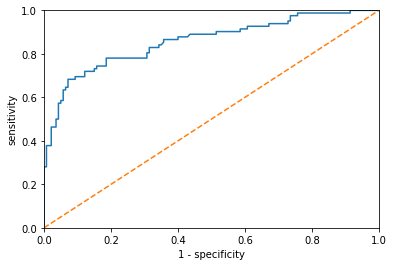

In [78]:
#Scikit_learn has a roc_curve function which takes the true target values and the predicted probabilities from the model
#The roc_curve function returns an array of the false positive rates (1-specificity - on x-axis), an array of the true positive
#rates (sensitivity - on y-axis) and the thresholds
#Build an ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot(fpr, tpr)
#plot a diagnal line to help visualize how far the model is from a model that predicts randomly
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.savefig('plot.png')
plt.show()

In [79]:
#Interpret the ROC curve
#The ROC curve is showing the performance not of a single model, but of many models
#Each choice of threshold is a different model
#Let's look at the ROC curve with these points highlighted

<img src="IMG_20230816_224924.jpg" style="width:400px;height:200px;">

In [80]:
#Each point A, B, and C refers to a model with a different threshold
#Model A has a sensitivity of 0.6 and a specificity of 0.9 (recall that the graph is showing 1-specificity)
#Model B has a sensitivity of 0.8 and a specificity of 0.7
#Model C has a sensitivity of 0.9 and a specificity of 0.5
#How to choose between these models will depend on the specifics of the situation
#The closer the curve gets to the upper left corner, the better the performance
#The line should never fall below the diagnal line as that would mean it performs worse than a random model

In [81]:
#Picking a model from the ROC curve
#The ROC curve is a way of helping us choose the ideal threshold for our problem
#To finalize a model, a single threshold that will be used to make predictions has to be chosen

In [82]:
#Area under the curve (AUC)
#Sometimes, we want to use the ROC curve to compare two different models
#A comparison of the ROC curves of two models

<img src="IMG_20230816_230700.jpg" style="width:400px;height:200px;">

In [83]:
#The blue curve outperforms the orange one since the blue line is almost always above the orange line
#To get an empirical measure of this, we calculate the Area Under the Curve (AUC)
#It's a value between 0 and 1, the higher the better
#Since the ROC is a graph of all the different Logistic Regression models with different thresholds, the AUC does not 
#measure the performance of a single model
#It gives a general sense of how well the Logistic Regression model is performing
#To find a single model, you still need to find the optimal threshold for your problem

In [84]:
#Calculate the AUC using roc_auc_score function in scikit-learn
#Build two Logistic Regression models on the Titanic dataset, model1 with 6 features and model2 with just Pclass and male features

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X =df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_proba1 = model1.predict_proba(X_test)
print("model1 AUC score:", roc_auc_score(y_test, y_pred_proba1[:, 1]))

model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train)
y_pred_proba2 = model2.predict_proba(X_test[:, 0:2])
print("model2 AUC score:", roc_auc_score(y_test, y_pred_proba2[:, 1]))

model1 AUC score: 0.8189749182115593
model2 AUC score: 0.8023655733579398


In [85]:
#k-fold Cross Validation
#Here's the result of a different random train test split in each row on the same dataset

<img src="IMG_20230817_120447.jpg" style="width:400px;height:200px;">

In [86]:
#Each time the model is run, we get different values for the metrics
#The accuracy ranges from 0.79 to 0.84, the precision from 0.75 to 0.81 and the recall from 0.63 to 0.75
#The values in the training set are never used to evaluate while it would be unfair to build the model with the training
#set and then evaluate with the training set, but we are not getting as full a picture of the model performance as possible
#Our goal is to get the best possible measure of our metrics (accuracy, precision, recall and F1 score)
#The code
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X =df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

#building the model
model = LogisticRegression()
model.fit(X_train, y_train)

#evaluating the model
y_pred = model.predict(X_test)
print("accuracy: {0:.5f}".format(accuracy_score(y_test, y_pred)))
print("precision: {0:.5f}".format(precision_score(y_test, y_pred)))
print("recall: {0:.5f}".format(recall_score(y_test, y_pred)))
print("f1 score: {0:.5f}".format(f1_score(y_test, y_pred)))

accuracy: 0.79279
precision: 0.80597
recall: 0.62069
f1 score: 0.70130


In [87]:
#Split the data into a training set and test set multiple times for k-fold validation
#Depending on our test set, we can get different values for the evaluation metrics
#We want to get a measure of how well our model does in general, not just a measure of how well it does on one specific test set
#Instead of just taking a chunk of the data as the test set, break the dataset into 5 chunks
#Assume there are 200 datapoints in the dataset

<img src="IMG_20230817_151613.jpg" style="width:400px;height:200px;">

In [88]:
#Each of these chunks will serve as a test set
#When Chunk 1 is the test set, the remaining 4 chunks are used as the training set

<img src="IMG_20230817_151557.jpg" style="width:400px;height:200px;">

In [89]:
#Each of the 5 times we have a test set of 20% (40 datapoints) and a training set of 80% (160 datapoints)
#Every datapoint is in exactly 1 test set

In [90]:
#Build and evaluate with multiple training and test sets
#For each training set, we build a model and evaluate it using associated test set

<img src="IMG_20230817_152335.jpg" style="width:400px;height:200px;">

In [91]:
#We report the accuracy as the mean of the 5 values
#(0.83+0.79+0.78+0.80+0.75)/5 = 0.79
#You will only see values this different when you have a small dataset
#With large datasets we often just do a training and test set for simplicity
#The process of creating multiple training and test sets is called k-fold cross validation
#The k is the number of chunks we split the dataset into
#The standard number is 5
#The goal in cross validation is to get accurate measures for our metrics - accuracy, precision, recall

In [92]:
#Final model choice in k-fold cross validation
#The 5 models were built just for evaluation purposes, so that we can report the metric values
#The best possible model is going to be a model that uses all of the data
#So, we keep track of our calculated values for our evaluation metrics and then build a model using all of the data
#It's worth using a little extra to make sure the right values are reported for evaluation and decision making
#Computation power for building a model can be a concern when the dataset is large in which case

In [93]:
#k-fold Cross Validation in sklearn
#Scikit_learn has already implemented the code to break the dataset into k chunks and create k training and test sets
#For simplicity, take a dataset with just 6 datapoints and 2 features and a 3-fold cross validation on the dataset
#Take the first 6 rows from the Titanic dataset and use just the Age and Fare columns
from sklearn.model_selection import KFold

#data prep
X = df[['Age', 'Fare']].values[:6]
y = df['Survived'].values[:6]

#instantiate a KFold class object which takes two parameters: n_splits (this is k, the number of chunks to create)
#and shuffle (whether or not to randomize the order of the data)
#It's generally good practice to shuffle the data since you often get a dataset that's in sorted order
kf = KFold(n_splits=3, shuffle=True)

#The KFold class has a split method that creates the 3 splits for the data
list(kf.split(X))

[(array([0, 3, 4, 5]), array([1, 2])),
 (array([1, 2, 3, 4]), array([0, 5])),
 (array([0, 1, 2, 5]), array([3, 4]))]

In [94]:
#The KFold class split method returns the indices that are in each of the splits
#The split is done randomly and so different datapoints in the sets each time you run the code
for train, test in kf.split(X):
    print(train, test)

[0 2 4 5] [1 3]
[1 2 3 4] [0 5]
[0 1 3 5] [2 4]


In [95]:
#Create training and test sets with the folds
#first of the 3 train/test split
splits = list(kf.split(X))
first_split = splits[0]
first_split

(array([0, 1, 2, 4]), array([3, 5]))

In [96]:
#the first array is the indices for the training set and the second is the indices for the test set
#create these variables
train_indices, test_indices = first_split
print("training set indices:", train_indices)
print("test set indices:", test_indices)

training set indices: [0 1 2 4]
test set indices: [3 5]


In [98]:
#create an X_train, y_train, X_test, y_test based on those indices
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

#training and test sets in the same format as from train_test_split
print("X_train")
print(X_train)
print("y_train", y_train)
print("X_test")
print(X_test)
print("y_test", y_test)

X_train
[[22.      7.25  ]
 [38.     71.2833]
 [26.      7.925 ]
 [35.      8.05  ]]
y_train [0 1 1 0]
X_test
[[35.     53.1   ]
 [27.      8.4583]]
y_test [1 0]


In [99]:
#Build a model
#the training and test sets can be used to build a model and make prediction
#now use the entire dataset as 4 datapoints is not enough to build a decent model
#build and score the model on the first fold of a 5-fold cross validation
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import pandas as pd

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

kf = KFold(n_splits=5, shuffle=True)

splits = list(kf.split(X))
train_indices, test_indices = splits[0]
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7865168539325843

In [100]:
#We've essentially done a single train/test split so far
#In order to do a k-fold cross validation, we need to use each of the other 4 splits to build a model and score the model
#Loop over all the folds
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    
print(scores)
print(np.mean(scores))

final_model = LogisticRegression()
final_model.fit(X, y)
print(final_model.score(X, y))

[0.7584269662921348, 0.8033707865168539, 0.8361581920903954, 0.7796610169491526, 0.8248587570621468]
0.8004951437821367
0.8049605411499436


In [101]:
#The KFold class is randomly splitting up the data each time, so a different split will result in different scores
#Having calculated thte accuracy, we no longer need the 5 different models
#For future use, we just want a single model
#To get the single best possible model, we build a model on the whole dataset
#If asked the accuracy of this model, we use the accuracy calculatd by cross validation

In [109]:
#Alternatively use the cross_val_score
from sklearn.model_selection import cross_val_score
model = LogisticRegression()
arr = cross_val_score(model, X, y, cv = 5)
cross_val_score(model, X, y, cv = 5)

array([0.79775281, 0.78651685, 0.77966102, 0.79096045, 0.81355932])

In [110]:
np.mean(arr)

0.7936900907763602

In [111]:
#Comparing different models
#Evaluation techniques are essential for deciding between multiple model options
#Use these techniques to compare 3 models:
#- A logistic regression model using all of the features in the dataset
#- A logistic regression model using just the Pclass, Age, and Sex columns
#- A logistic regression model using just the Fare and Age columns

In [116]:
#import the necessary modules
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

#prep the data
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'

#build the KFold object using 5 splits as that's standard for all of the models to use
kf = KFold(n_splits=5, shuffle=True)

#create three different feature matrices X1, X2, X3 having the same target y
X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values

#define a function to score the model which uses the KFold object to calculate the accuracy, precision, recall, F1 score for
#a Logistic Regression model with the given feature matrix X and target array y
def score_model(X, y, kf):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy_scores))
    print("precision:", np.mean(precision_scores))
    print("recall:", np.mean(recall_scores))
    print("f1 score:", np.mean(f1_scores))
        
print("Logistic Regression with all features")
score_model(X1, y, kf)
print()
print("Logistic Regression with Pclass, Sex and Age features")
score_model(X2, y, kf)
print()
print("Logistic Regression with Fare and Age features")
score_model(X3, y, kf)

Logistic Regression with all features
accuracy: 0.7970926172792484
precision: 0.762653995250328
recall: 0.6964757715402877
f1 score: 0.7242894863010727

Logistic Regression with Pclass, Sex and Age features
accuracy: 0.7937535707484289
precision: 0.7503079710144928
recall: 0.7015389240155999
f1 score: 0.7231125585532594

Logistic Regression with Fare and Age features
accuracy: 0.6584142702977211
precision: 0.6603649068322982
recall: 0.2435247381726255
f1 score: 0.3532272727272727


In [117]:
#Sligtly different results every time the code is run as the k-fold splits are chosen randomly
#Choose the best model
#The first two models have almost identical scores while the third model has lower scores for all four metrics
#Since the first two models have equivalent results, it makes sence to choose the simpler model - with the Pclass, Sex, Age features
#Having chosen the best model, build a single final model using all of the data
model = LogisticRegression()
model.fit(X1, y)
#predict
model.predict([[3, False, 25, 0, 1, 2]])


array([1], dtype=int64)

In [118]:
#Three different combinations of features have been tried
#It's possible a different combination would also work